In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("D:\\Desktop\\projects\\train.csv")
test = pd.read_csv("D:\\Desktop\\projects\\test.csv")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4368\90507903.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print(train.shape)
print(train.info())
print(train.head())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


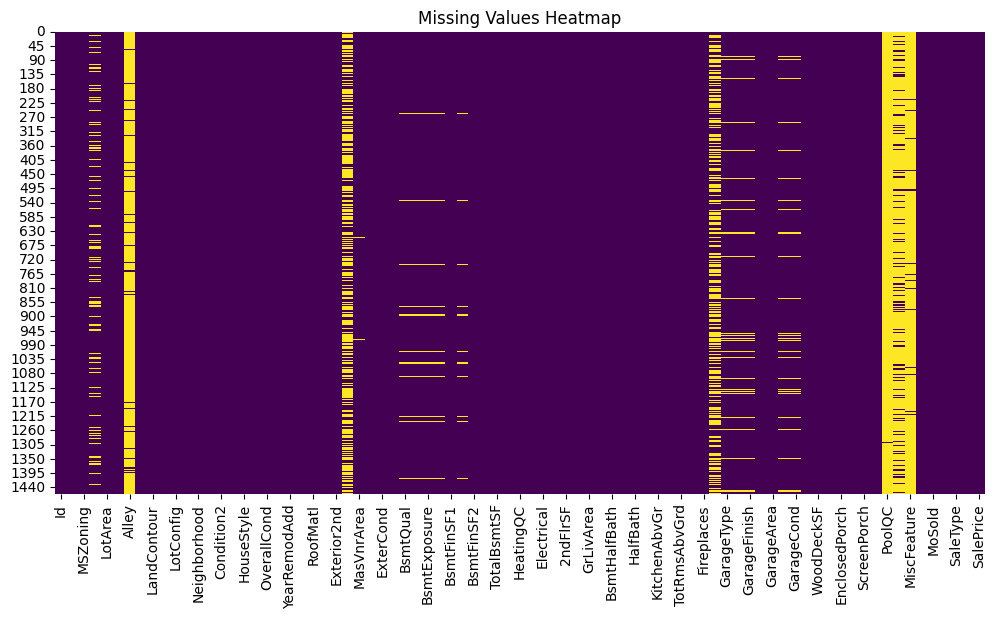

In [3]:
# Checking missing values
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

# Visualizing missing data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

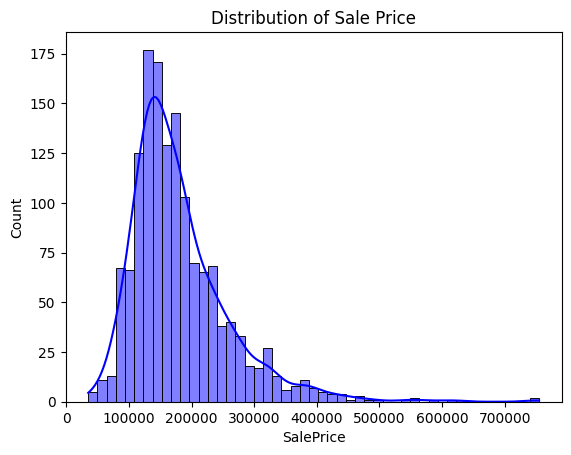

In [4]:
# Distribution of Sale Price
sns.histplot(train['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Price')
plt.show()

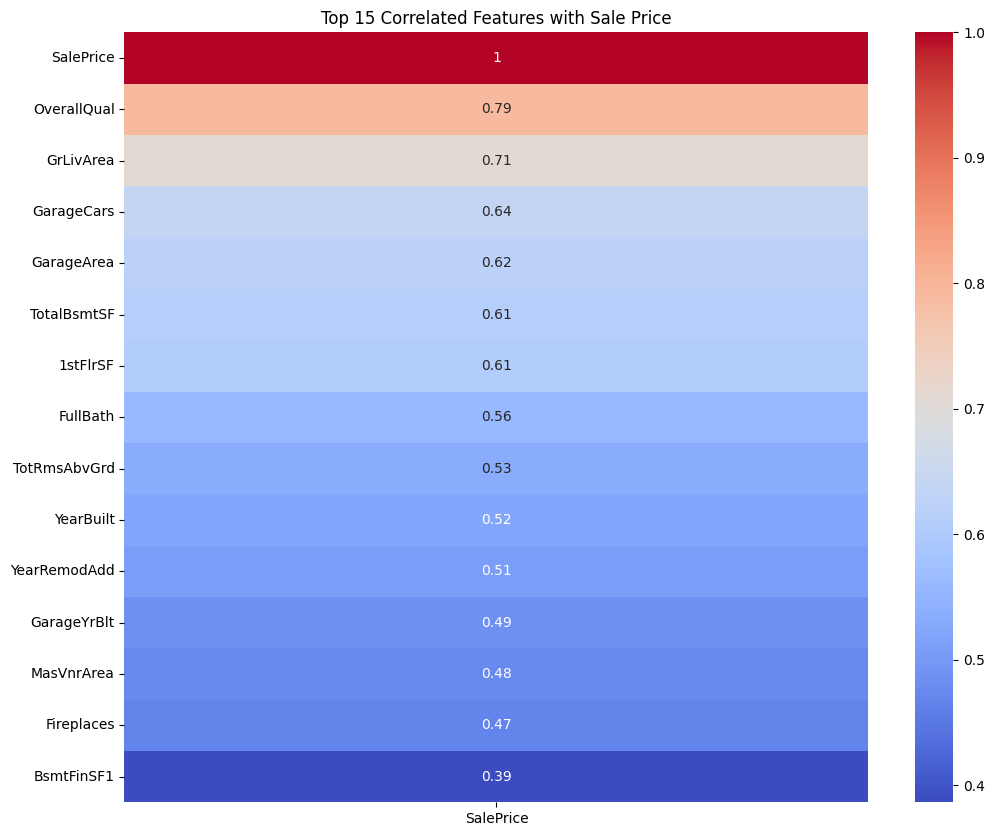

In [5]:
# Selecting only numeric columns
corr = train.select_dtypes(include=[np.number]).corr()

# Plotting the top 15 correlated features with Sale Price
plt.figure(figsize=(12, 10))
sns.heatmap(corr['SalePrice'].sort_values(ascending=False).head(15).to_frame(),
            annot=True, cmap='coolwarm')
plt.title("Top 15 Correlated Features with Sale Price")
plt.show()

In [6]:
# Filling numerical missing values with median
for col in train.select_dtypes(include=[np.number]).columns:
    train[col].fillna(train[col].median(), inplace=True)

# Filling categorical missing values with mode
for col in train.select_dtypes(include=['object']).columns:
    train[col].fillna(train[col].mode()[0], inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4368\4170976817.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4368\4170976817.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [7]:
# Storing the target variable before encoding
y = train['SalePrice']
train = train.drop('SalePrice', axis=1)


In [8]:
# Applying one-hot encoding to the feature sets
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Reattaching the target variable after encoding
train['SalePrice'] = y


In [9]:
from sklearn.preprocessing import StandardScaler
train, test = train.align(test, join='left', axis=1, fill_value=0)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
print("Train and test data scaled successfully!")

Train and test data scaled successfully!


In [10]:
from sklearn.model_selection import train_test_split

if 'SalePrice' in train.columns:
  X = train.drop('SalePrice', axis=1)
  y_full = train['SalePrice']


In [11]:
if 'SalePrice' in test.columns:
    test = test.drop('SalePrice', axis=1)
X, test = X.align(test, join='left', axis=1, fill_value=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(
    xgb,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
final_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
    print(f"{name} RMSE: {rmse:.4f}")

Linear Regression RMSE: 388345298882046.0000
Ridge Regression RMSE: 47693.9972


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.482e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Lasso Regression RMSE: 51257.4829
Random Forest RMSE: 29448.7944
XGBoost RMSE: 28514.2403


In [14]:
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE: {-grid_search.best_score_}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best RMSE: 28412.10885066893


In [15]:
final_model = grid_search.best_estimator_
test_predictions = final_model.predict(test_scaled)

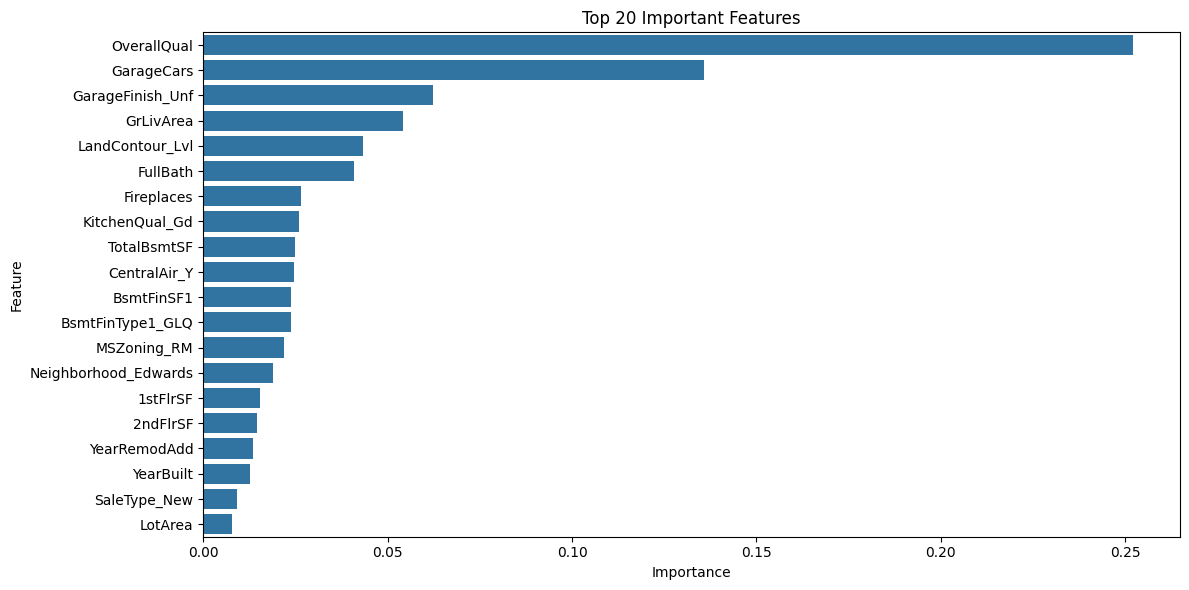

In [16]:
importances = final_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature')
plt.title("Top 20 Important Features")
plt.tight_layout()
plt.show()


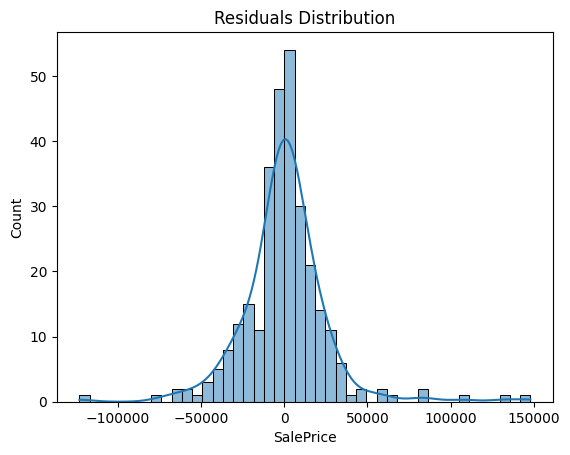

In [17]:
residuals = y_val - final_model.predict(X_val)
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

In [18]:
import joblib
joblib.dump(final_model, 'final_xgb_model.pkl')

['final_xgb_model.pkl']

In [19]:
submission = pd.DataFrame({
    'Id': test.index,  # Make sure this matches the test set's original index
    'SalePrice': test_predictions
})
submission.to_csv("submission.csv", index=False)


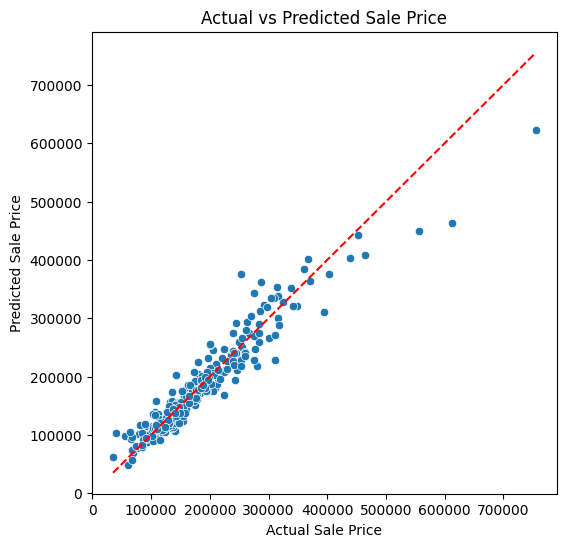

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted Sale Price
y_pred_val = final_model.predict(X_val)
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_val, y=y_pred_val)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.show()
